source : https://ins.uni-bonn.de/media/public/courses/WS1819/practical-lab-numerical-simulation/riverlevels.pandas.pickle?pk=212

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### The dataset

In [3]:
df = pd.read_pickle("riverlevels.pandas.pickle")

df.head()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
1980-12-31 23:15:00+00:00,307.0,NaN,NaN,NaN,NaN,199.0,NaN,NaN,289.0,NaN,NaN,NaN,NaN,NaN,153.0
1980-12-31 23:30:00+00:00,307.0,NaN,NaN,NaN,NaN,199.0,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,153.0
1980-12-31 23:45:00+00:00,307.0,NaN,NaN,NaN,NaN,198.0,NaN,NaN,289.0,NaN,NaN,NaN,NaN,NaN,153.0
1981-01-01 00:00:00+00:00,307.0,NaN,NaN,NaN,NaN,198.0,NaN,NaN,289.0,NaN,NaN,NaN,NaN,NaN,153.0
1981-01-01 00:15:00+00:00,307.0,NaN,NaN,NaN,NaN,198.0,NaN,NaN,289.0,NaN,NaN,NaN,NaN,NaN,153.0


We see that we have observations every 15 minutes. Thus in one day we have in total 4 * 24 observations.

In [4]:
df.tail()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2014-12-31 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31 22:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31 22:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31 22:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The task 

The task is to predict the rivel level one step in the future.

#### The missing values / The dataset used for the prediction

Due to memory limitations, we use only the last 30 days ( December 2014 ) of the dataset in order to make our prediction.

First we observe that in December 2014, there are a lot missing values in the dataset. We replace the NaN values by averages of  time, date and city in the last 20 years.

For example, in the table above we see that the last observation for Andernach is a missing value. We replace it by the average of all non-missing values of Andernach at the same date and time in the last 20 years.

After we fix the missing values problem, we define the Hankel matrix, based on this "new" dataset.

In [6]:
for row_index in range(1192128 - 4*24*30, 1192128) :  # the index runs over the observations of the last 30 days of the dataset
    
    # now we work for each row separately
    v = df.iloc[row_index]
    for j in range(15) :
        if np.isnan(v[j]) == True :  # if it is a NaN value
            v_past_av = 0 ; n = 0
            for i in range(3):
                if np.isnan(df.iloc[row_index - i*4*24*365][j]) == False :  # if it is a number
                    v_past_av += df.iloc[row_index - i*4*24*365][j] 
                    n += 1
            for i in range(4):
                 if np.isnan(df.iloc[row_index - (i+3)*4*24*365 - 4*24 ][j]) == False :
                    v_past_av += df.iloc[row_index - (i+3)*4*24*365 - 4*24 ][j]
                    n += 1
            for i in range(4) :
                if np.isnan(df.iloc[row_index - (i+7)*4*24*365 - 2*(4*24) ][j]) == False :
                    v_past_av += df.iloc[row_index - (i+7)*4*24*365 - 2*(4*24) ][j]
                    n += 1
            for i in range(4) :
                if np.isnan( df.iloc[row_index - (i+11)*4*24*365 - 3*(4*24) ][j]) == False :
                    v_past_av += df.iloc[row_index - (i+11)*4*24*365 - 3*(4*24) ][j]
                    n += 1
            for i in range(3) :
                if np.isnan(df.iloc[row_index - (i+15)*4*24*365 - 4*(4*24) ][j]) == False  :
                    v_past_av += df.iloc[row_index - (i+15)*4*24*365 - 4*(4*24) ][j]
                    n += 1
            for i in range(2) :   
                if np.isnan(df.iloc[row_index - (i+19)*4*24*365 - 5*(4*24) ][j]) == False :
                    v_past_av += df.iloc[row_index - (i+19)*4*24*365 - 5*(4*24) ][j]
                    n +=1
            v[j] = (v_past_av)/n


In [8]:
df1 = df[1192128 - 4*24*30:1192128]
df1.head()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2014-12-01 23:15:00+00:00,241.055556,176.833333,273.055556,172.833333,226.444444,181.333333,198.444444,142.0,261.388889,204.222222,162.277778,142.277778,236.611111,319.555556,162.722222
2014-12-01 23:30:00+00:00,240.888889,176.611111,273.000000,172.777778,226.666667,181.333333,198.111111,143.0,261.444444,204.388889,162.388889,142.611111,236.555556,319.722222,162.555556
2014-12-01 23:45:00+00:00,240.944444,176.555556,272.888889,172.555556,226.666667,181.555556,198.055556,144.0,261.388889,204.444444,162.166667,142.166667,236.611111,319.833333,162.722222
2014-12-02 00:00:00+00:00,240.944444,176.611111,273.111111,172.055556,226.833333,181.444444,198.166667,144.0,261.722222,204.500000,162.277778,142.444444,236.888889,319.611111,162.944444
2014-12-02 00:15:00+00:00,241.055556,176.500000,273.166667,172.333333,227.111111,181.444444,197.833333,144.0,262.166667,204.444444,162.166667,142.000000,236.833333,319.722222,162.555556


In [9]:
df1.tail()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2014-12-31 22:00:00+00:00,368.888889,237.055556,400.277778,192.388889,301.333333,266.000000,307.888889,217.0,328.833333,321.444444,219.722222,161.666667,259.500000,389.944444,237.888889
2014-12-31 22:15:00+00:00,368.722222,237.111111,400.388889,192.055556,301.166667,265.944444,307.777778,217.0,328.722222,321.444444,219.666667,161.944444,258.944444,389.944444,237.888889
2014-12-31 22:30:00+00:00,368.666667,237.166667,400.555556,191.833333,301.055556,265.888889,307.833333,216.0,328.833333,321.444444,219.500000,162.333333,258.333333,389.833333,237.888889
2014-12-31 22:45:00+00:00,368.555556,237.277778,400.555556,191.833333,301.000000,265.944444,307.777778,216.0,328.666667,321.277778,219.555556,162.833333,257.888889,389.611111,238.111111
2014-12-31 23:00:00+00:00,368.555556,237.111111,400.277778,191.833333,301.166667,265.888889,307.500000,216.0,328.722222,321.222222,219.611111,163.111111,257.555556,389.500000,237.944444


In [10]:
# are there any missing values in the dataset ?
df1.isnull().values.any()

False

#### The "time-delayed" Hankel matrix

In [11]:
val = df1.values

In [12]:
h = 2    # time steps
n = 940
l = 1000   # length of observations (rows) taken into account for each feature (column)
H = np.zeros((val.shape[1]*n,l))
for i in range(n):
    for j in range(val.shape[1]):
        H[i*val.shape[1]+j,:] = val[i*h:i*h+l,j]

In [13]:
H.shape

(14100, 1000)

In [14]:
u,s,v = np.linalg.svd(H)

<IPython.core.display.Javascript object>


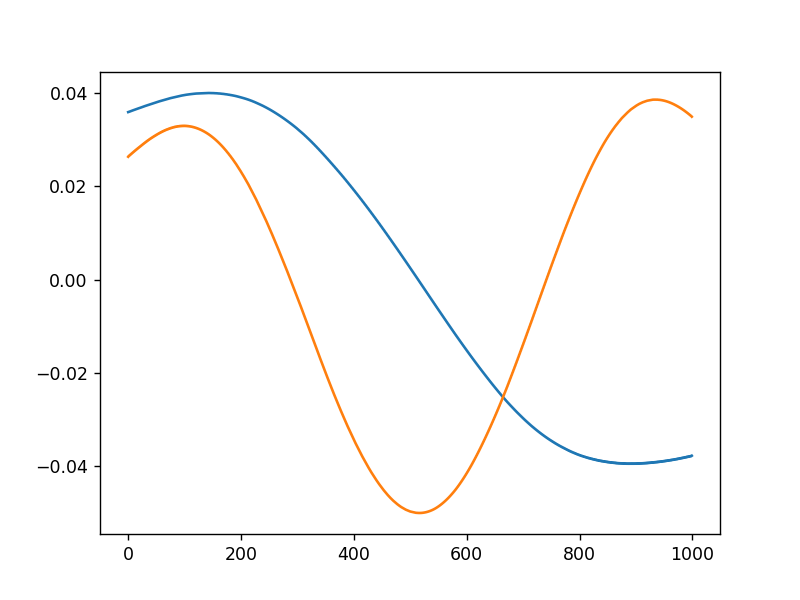

In [15]:
%matplotlib notebook
plt.plot(np.arange(v.shape[0]),v[1,:])
plt.plot(np.arange(v.shape[0]),v[2,:])

Remark :

We observe that the graph of the principal components resembles a sinusoidal graph. This is an indication that the underlying dynamical system is "close" to become a linear dynamical system.

Consequently, we can now use the DMD algorithm to determine the dmd modes of the system. Then we use them to make predictions for the future behaviour of the model.

#### The "dmd" and the "time evolution" functions

In [16]:
def dmd (A,r):
    """
    A : data-matrix, snapshots of a "linear" dynamical system
    Phi : the dmd modes
    """
    
    X = A[:,:-1]
    Y = A[:,1:]
    
    u,s,v = np.linalg.svd(X)
    U = u[:,:r]
    S = np.diag(s)[:r,:r]
    V = np.conjugate(v).T[:,:r]
    
    Atil = (((np.conjugate(U).T@Y)@V)@np.linalg.inv(S))
    mu,W = np.linalg.eig(Atil)

    Phi = (((Y@V)@np.linalg.inv(S))@ W) 
    
    b = ((np.linalg.pinv(Phi))@X[:,0])
    
    return mu, Phi, b

In [17]:
def time_evolution (A,r,f):
    """
    f : future time steps 
    """
    t = np.arange(A.shape[1]+f)
    
    Psi = np.zeros((r, t.size), dtype='complex')
    j = dmd(A,r)
    for i,_t in enumerate(t):
        Psi[:,i] = (j[0]**_t)*j[2]
    E = j[1]@Psi
    
    return E

#### The prediction

In [18]:
# How many principal components should we take into account ?

np.sum(s[:90])/np.sum(s)

0.9458511828148355

In [19]:
D = time_evolution(H,90,1) # We predict one step ahead in the future (f = 1)

The prediction is :

In [20]:
for i,j in enumerate(df.columns):
    print('prediction for',j, 'is' ,D.real[i-15,:][-1])

prediction for Andernach is 368.99214864096757
prediction for Bingen is 237.18560332555586
prediction for Bonn is 400.7814870555772
prediction for Frankfurt Osthafen is 191.73546525223122
prediction for Kalkofen Neu is 300.84628450330416
prediction for Kaub is 266.087503738341
prediction for Koblenz is 308.186699873881
prediction for Koblenz Up is 215.04861597981798
prediction for Mainz is 329.31826503519284
prediction for Oberwinter is 321.7599448638986
prediction for Oestrich is 219.56848271744104
prediction for Raunheim is 163.65692096580145
prediction for Rockenau Ska is 259.02734366078545
prediction for Speyer is 390.26129566612656
prediction for Worms is 237.82413634358193


Compare with the last "real" (averaged) values : 

In [21]:
d = df.iloc[-1]
d

Andernach             368.555556
Bingen                237.111111
Bonn                  400.277778
Frankfurt Osthafen    191.833333
Kalkofen Neu          301.166667
Kaub                  265.888889
Koblenz               307.500000
Koblenz Up            216.000000
Mainz                 328.722222
Oberwinter            321.222222
Oestrich              219.611111
Raunheim              163.111111
Rockenau Ska          257.555556
Speyer                389.500000
Worms                 237.944444
Name: 2014-12-31 23:00:00+00:00, dtype: float64